###    Pipeline to illustrate GWAS ina tetraploid species
    It uses gen format instead of vcf. gen format contains
       chr pos alleles ....
    space / tab separated


In [41]:
import numpy as np
import gzip
import sys
import time
import os
import matplotlib.pyplot as plt

# specific seqbreed modules
#from SeqBreed import genome as gg
#from SeqBreed.selection import selection as sel
from SeqBreed import genome as gg
from SeqBreed.selection import selection as sel

In [42]:
# current dir
cdir = os.getcwd()

# working directory
wdir = cdir

# input file dir
ddir = cdir

# working files, seqfile contains snp positions from vcf
# this file is generated by gg.GFounder below
seqfile = 'seq.pos'

# list of chips that can be analyzed, include sequence as output from gg.GFounder()
chipfiles = [seqfile]
# contains qtn positions
qtnfile = ddir + '/potato.qtn.pos'
# gene dropping pedigree
pedfile = ddir + '/potato.ped'
# snp file in gen format
genfile = ddir + '/potato.gen.gz'

# goto working directory
os.chdir(wdir)

In [39]:
# STEP 1:
# uploads genotypes and generates snp positions (snpFile)
# NOTE that ploidy level must be specified if gen format
gbase = gg.GFounder(vcfFile=genfile, snpFile=seqfile, ploidy=4)

# STEP 2: generates Genome object with chr names, recombination map, etc
gfeatures = gg.Genome(snpFile=seqfile, ploidy=gbase.ploidy)

# prints some basic info
gfeatures.print()

ploidy: 4
N base: 150
N snps: 396
GENOME FEATURES (ploidy = 4)
Chr  Type   bplength    Nsnps length_m length_f
1  Autos  87463611 47 [0.87463611, 0.87463611]
2  Autos  47326485 34 [0.47326485, 0.47326485]
3  Autos  61870684 41 [0.61870684, 0.61870684]
4  Autos  72022392 42 [0.72022392, 0.72022392]
5  Autos  51998374 28 [0.51998374, 0.51998374]
6  Autos  58259275 41 [0.58259275, 0.58259275]
7  Autos  54961836 32 [0.54961836, 0.54961836]
8  Autos  55254403 24 [0.55254403, 0.55254403]
9  Autos  61466245 36 [0.61466245, 0.61466245]
10  Autos  59236087 21 [0.59236087, 0.59236087]
11  Autos  45059903 30 [0.45059903, 0.45059903]
12  Autos  60754928 20 [0.60754928, 0.60754928]
All        715674223  396 [7.15674223 7.15674223]



In [43]:
# STEP 3: read QTN file
qtn = gg.QTNs(h2=[0.5, 0.7], genome=gfeatures, qtnFile=qtnfile)
qtn.get_var(gfeatures,gbase)
qtn.print(gfeatures)

#h2 by trait 0.5 0.7
#se undefined
1 11774418 0.815 11.7184051065355 0.0 41.409153050536545 0.0 0.0 0.0 0.0 0.0
1 44702400 0.367 15.392624773998019 0.0 110.04216791892752 0.0 -0.629465530680119 0.629465530680119 0.09896474981488353 0.08546955665830851
1 55163677 0.363 0.000395092341315046 0.0 7.22178531345309e-08 0.0 -2.39471364889909 -2.39471364889909 4.301686403870654 1.2274445497955535
1 67459462 0.390 0.0058249517348463 0.0 1.614392383898287e-05 0.0 2.22910221324965 -2.22910221324965 1.4383799121100012 1.124886854342437
1 78663168 0.058 -0.0709808271028144 0.0 0.0005535107989741541 0.0 0.0 0.0 0.0 0.0
1 80228612 0.787 6.3576619527309095 0.0 13.566703302012758 0.0 0.699327735963157 -0.699327735963157 0.4063333392157242 0.05509604599535242
1 87196723 0.750 1.39539298573484 0.0 0.7301705942392467 0.0 0.0 0.0 0.0 0.0
2 37438491 0.620 3.32499841243582 0.0 5.209405525400581 0.0 -0.29435892536290104 -0.29435892536290104 0.023582339309754598 0.01923822417374717
2 46986482 0.163 0.001106572

In [44]:
# STEP 4: generate base population
pop = gg.Population(gfeatures, pedFile=None, generation=None, qtns=qtn, gfounders=gbase)
pop.print()

#ID FATHER MOTHER SEX GENERATION Y_0 ADD_0 GEN_0 Y_1 ADD_1 GEN_1 EBV 
1 0 0 0 0 -25.574128292560776 6.876353375662287 6.876353375662287 -13.787710499396855 -6.476242226059082 -16.40659865395019 nan
2 0 0 1 0 36.533989450867644 24.445646662930397 24.445646662930397 -14.025965997036007 -3.1819924516662246 -14.45967903913159 nan
3 0 0 0 0 33.638373598289206 43.04678229904684 43.04678229904684 -19.245975115463626 -8.26292475977917 -19.283116367817613 nan
4 0 0 0 0 -6.414763589552518 23.647912221771463 23.647912221771463 -22.014676930726594 -10.147555421143034 -21.34196373519892 nan
5 0 0 0 0 40.25251903801608 17.279671687351808 17.279671687351808 -14.119348684157043 -4.2084600683246896 -14.053793150921685 nan
6 0 0 0 0 -2.9148247584973284 7.433116333936299 7.433116333936299 -13.509623843047963 -3.3153365189198367 -13.338820024685043 nan
7 0 0 0 0 31.247290621696823 10.105900868588797 10.105900868588797 -12.359207873468527 -5.227555839431265 -12.142759124728492 nan
8 0 0 0 0 -2.498431410948

In [36]:
pop.n

150

In [67]:
# STEP 5: Simulate a F2 between the 10 most extreme lowest and highest lines for second phenotype
#--> Sort phenotypes and sel parents
itrait = 1
nsel = 10
y = np.array(list(pop.inds[i].y[itrait] for i in range(pop.n))) # phenotypes
print(y)

[-1.37877105e+01 -1.40259660e+01 -1.92459751e+01 -2.20146769e+01
 -1.41193487e+01 -1.35096238e+01 -1.23592079e+01 -1.24270284e+01
 -2.09620984e+01 -2.06069392e+01 -2.07055778e+01 -1.51627086e+01
 -1.03691016e+01 -1.20777384e+01 -1.08803867e+01  3.36791201e+00
 -2.10399444e+01 -1.09552108e+01 -1.58390009e+01 -2.17247300e+01
 -1.90295295e+01 -1.80779119e+01 -1.65931631e+01 -1.99898972e+01
 -1.42294096e+01 -1.38884172e+01 -2.46449190e+01 -2.07697982e+01
 -1.48290817e+01 -8.67141527e+00 -1.62801159e+01 -2.05743587e+01
 -1.83606746e+01 -1.25481701e+01 -1.34307347e+01 -1.15320161e+01
 -1.28666039e+01 -1.20042601e+01 -1.43497209e+01 -2.49227600e+01
 -2.03816579e+01 -2.09903573e+01 -1.61616412e+01 -1.90029504e+01
 -2.33884167e+01 -8.51159441e+00 -1.40564530e+01 -2.03644654e+01
 -1.32538011e+01 -1.50617782e+01 -1.44158303e+01 -1.06315899e+01
 -1.37305249e+01 -2.08905591e+01 -2.37708201e+01 -2.13902259e+01
 -9.26022328e+00 -1.51338217e+01 -2.10014668e+01 -9.26689807e+00
 -1.16095853e+01 -5.24850

In [56]:
yindex = np.argsort(y)
ilow = yindex[:nsel]
ihigh = np.random.permutation(yindex[-nsel:]) # random mating between extremes

#--> F1 between lowest and highest inds
n0 = pop.n
for i in range(nsel):
    parents = [pop.inds[ilow[i]], pop.inds[ihigh[i]] ]
    pop.addInd(parents, genome=gfeatures, gfounders=gbase, qtns=qtn, id=None, sex=None, t=1)

#--> F2 by selfcrossing
noff = 20
n1 = pop.n
for i in range(nsel):
    iid = n0+i # index of parent
    parents = [pop.inds[iid], pop.inds[iid]]
    for j in range(noff):
        pop.addInd(parents, genome=gfeatures, gfounders=gbase, qtns=qtn, id=None, sex=None, t=2)


In [58]:
# STEP 5: GWAS
# generate chip objects
chipseq = gg.Chip(chipFile=seqfile, genome=gfeatures, name='seq_chip')

# get genotypes
X = gg.do_X(pop.inds, gfeatures, gbase, chip=chipseq)

In [66]:
#chipseq.print(gfeatures)
print (chipseq.nsnp)
len (pop.inds)

[47, 34, 41, 42, 28, 41, 32, 24, 36, 21, 30, 20]


780

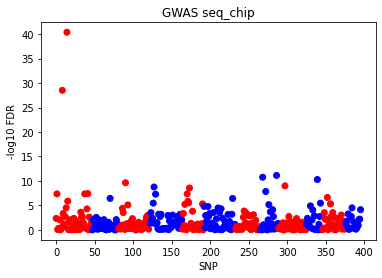

#CHR POS COEFF SE PVALUE FDR
1 559640 3.791514949849609 1.1518372997706972 0.001057619409674626 0.004503411679904859
1 1838864 -6.881392059354348 1.1190801583096786 1.4693112165981583e-09 4.342263578108434e-08
1 4258451 0.4140733477685619 1.1747846864761613 0.724618479703391 0.8190343406329454
1 5431075 1.2806427393491093 1.3999864779612106 0.36070913148226114 0.4875113176347283
1 6071917 0.20219861677392936 1.1766566295673264 0.8636232258127094 0.920711604457864
1 6143327 4.529245441823627 1.4827946186812333 0.0023597944453481725 0.0086525796329433
1 6295542 -0.2456846239116395 1.3295099701213844 0.8534570716470902 0.9159051500602919
1 6587872 -1.5457695939417784 1.2477822587518212 0.2159262352862915 0.33401089520848215
1 11774418 14.099916336177511 1.1344334147291115 1.5311403351751414e-31 3.0316578636467795e-29
1 13546944 6.474954277174222 1.6062178098600466 6.306763842906225e-05 0.0004624960151464565
1 29676849 3.075760125007062 1.3888181983687682 0.027179541362024266 0.06449899822

In [48]:
# GWAS for first trait
gwas = sel.Gwas(X, chipseq)
gwas.fit(pop.inds, trait=0)
gwas.plot(fdr=True)    # FDR
gwas.print(gfeatures)  # prints gwas results

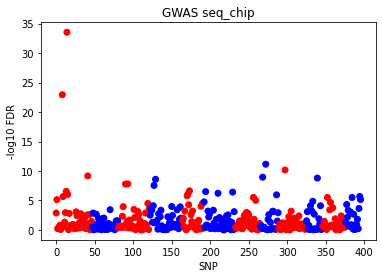

#CHR POS COEFF SE PVALUE FDR
1 559640 5.925207571144275 1.596979157465563 0.00023994562277253993 0.0013382882622243073
1 1838864 -7.383623610259736 1.4387967658394127 4.7161940443226224e-07 7.1831263136606086e-06
1 4258451 1.2616136177954804 1.765816885480469 0.47540554616851205 0.5920144537192792
1 5431075 1.267904159514678 1.8822676345813556 0.5009973673623787 0.6090039111412293
1 6071917 2.230873970727416 1.6393404486057066 0.1744214800039528 0.27628362432626125
1 6143327 3.8813955591593143 2.2560505371960065 0.08621692030859494 0.16335837532154832
1 6295542 0.5562231925985066 1.8121363841608022 0.7590649582925699 0.8326585138056999
1 6587872 1.7693875855339785 1.7477388727943393 0.3120369296140757 0.423173370298541
1 11774418 16.71823548451185 1.4644157925001813 5.93293278166062e-26 1.1747206907688027e-23
1 13546944 14.126607588856416 2.6162941674529274 1.2200214003953782e-07 2.1960385207116807e-06
1 29676849 2.8487548586047047 1.8972542726500554 0.13410400129739794 0.2289016573869

In [46]:
# GWAS for second trait
gwas = sel.Gwas(X, chipseq)
gwas.fit(pop.inds, trait=1)
gwas.plot(fdr=True)    # FDR
gwas.print(gfeatures)  # prints gwas results

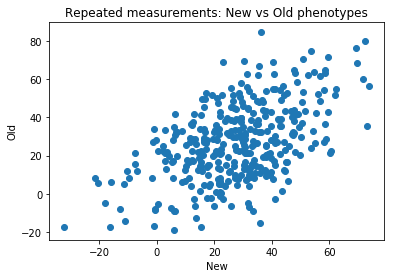

In [6]:
# Appendix: How to simulate repeated measurements
itrait = 0
current_y = np.array(list(ind.y[itrait] for ind in pop.inds))
new_y = np.array([])
for ind in pop.inds:
    y = ind.g_add[itrait] + ind.g_dom[itrait] + np.random.normal(0, qtn.se[itrait])
    new_y = np.append(new_y, y)

# plot new_y vs current_y
plt.scatter(new_y, current_y)
plt.title('Repeated measurements: New vs Old phenotypes')
plt.xlabel('New')
plt.ylabel('Old')
plt.show()
plt.close()

In [ ]:
# Easy, isn't it?